**LIFE EXPECTANCY**

THE PURPOSE OF THIS ANALYSIS IS TO EXAMINE WHETHER :

1.Is there  a statistically  difference in life expectancy between the population means of developing countries versus developed countries in the year 2000 ?
2.Is there a statistically difference in life expectancy between the population means of the years 2000 versus 2015 ?

Ho: μ1 - μ2 = 0
Ha: μ1 - μ2 ≠ 0

Imports and Dataset Load

In [2]:
# To keep the page organized do all imports here
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from scipy import stats

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

# Suppress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

# Database credentials
postgres_user = 'dabc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

# Use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
life_df = pd.read_sql_table('lifeexpectancy', con=engine)

# Remove the connection
engine.dispose()

# Now, quickly examine your DataFrame

life_df.shape

(2938, 22)

**Section 1: Data Cleaning**

In [3]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
life_df.describe().iloc[:, 1:]

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# finding the sum of nulls values for each variable 
life_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Drop 'NaN' rows in variable Life expectacy
life_df =life_df.dropna(subset = ["Life expectancy "])
life_df.shape

(2928, 22)

Now that NaN rows in variable life expectancy have been dealt with, the data cleaning section is complete.



**Section 2:** **statistical significance tests**.
Hypothesis 1:
Is there  a statistically  difference in life expectancy between the population means of developing countries versus developed countries in the year 2000 ?

In [ ]:
life_df_2000 = life_df[life_df['Year'] == 2000]

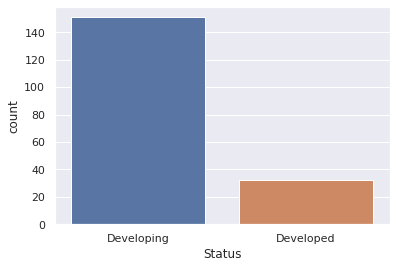

In [ ]:
# Show the count for this column
sns.countplot(x= 'Status', data= life_df_2000)

In [ ]:
# Determine the range of values and the type of distribution of the numbers.
# Write a function that will print these details for a given Series.
def series_statistics(column):
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [ ]:
series_statistics(life_df['Life expectancy '])

statistics for column: Life expectancy 
The max value in the column: 89.0
The min value in the column: 36.3
The mode value in the column: 0    73.0
dtype: float64
The median value in the column: 72.1
The mean of the column: 69.22493169398912
The std of the column: 9.523867487824278


In [ ]:
#  Describe the range of life expectancy

# best to use the built in .describe().
life_df['Life expectancy '].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [ ]:
# Is there  a statistically  difference in life expectancy between the population means of 
# developing countries versus developed countries in the year 2000 ?

# First, let's see what data we have
life_df[['Status', 'Year', 'Life expectancy ']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Status            2928 non-null   object 
 1   Year              2928 non-null   int64  
 2   Life expectancy   2928 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [ ]:
life_expectancy_developing_2000 = life_df[(life_df['Status'] == 'Developing' ) & (life_df['Year'] == 2000) & (life_df['Life expectancy ']).values]
life_expectancy_developing_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 15 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          151 non-null    object 
 1   Year                             151 non-null    int64  
 2   Status                           151 non-null    object 
 3   Life expectancy                  151 non-null    float64
 4   Adult Mortality                  151 non-null    float64
 5   infant deaths                    151 non-null    int64  
 6   Alcohol                          150 non-null    float64
 7   percentage expenditure           151 non-null    float64
 8   Hepatitis B                      68 non-null     float64
 9   Measles                          151 non-null    int64  
 10   BMI                             149 non-null    float64
 11  under-five deaths                151 non-null    int64  
 12  Polio               

In [ ]:
life_expectancy_developed_2000 = life_df[(life_df['Status'] == 'Developed' ) & (life_df['Year'] == 2000) & (life_df['Life expectancy ']).values]
life_expectancy_developed_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 128 to 2809
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          32 non-null     object 
 1   Year                             32 non-null     int64  
 2   Status                           32 non-null     object 
 3   Life expectancy                  32 non-null     float64
 4   Adult Mortality                  32 non-null     float64
 5   infant deaths                    32 non-null     int64  
 6   Alcohol                          32 non-null     float64
 7   percentage expenditure           32 non-null     float64
 8   Hepatitis B                      17 non-null     float64
 9   Measles                          32 non-null     int64  
 10   BMI                             32 non-null     float64
 11  under-five deaths                32 non-null     int64  
 12  Polio               

In [ ]:
stats.ttest_ind(life_expectancy_developing_2000['Life expectancy '], life_expectancy_developed_2000['Life expectancy '])

Ttest_indResult(statistic=-6.793134465815448, pvalue=1.5272373868268973e-10)

There is a difference of 6.8 standard deviations between these two means. But is this just due to random chance, or is that difference significant? The p-value is extremely small, implying that this is a real difference.



In [ ]:
# It's a good idea to write a function for a task that you expect to repeat.
# Calculate the sample size, mean, and variance of each sample.
# You will need this information to calculate standard errors.
# Calculate the standard error and compute the confidence intervals.

import math
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(life_expectancy_developing_2000['Life expectancy '], life_expectancy_developed_2000['Life expectancy '])

'The difference in means at the 95% confidence interval (two-tail) is between 10.32000207802613 and 14.046512822636009.'

Reject the null that is no difference between the population means. This difference is significant at the <.05 level. With 95% confidence, the diffence is between 10 years and 14 years diference in means.

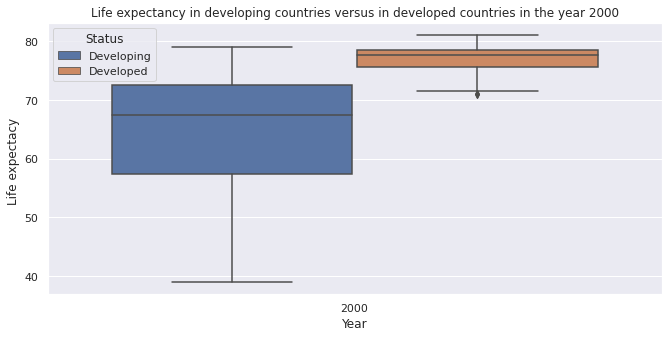

In [ ]:
# Plot a boxplot to see how life expectancy distributed accross status in the year 2000
plt.figure(figsize = (11,5))
sns.boxplot(x="Year", y="Life expectancy ", hue="Status", data=life_df_2000)
plt.xlabel('Year')
plt.ylabel('Life expectacy ')
plt.title('Life expectancy in developing countries versus in developed countries in the year 2000')
plt.show()

Is there a statistically difference in life expectancy between the population means of the years **2000** versus **2015** ?

In [ ]:
life_df_2000_2015 = life_df.query('Year in [2000, 2015]')
life_df_2000_2015.shape

(366, 22)

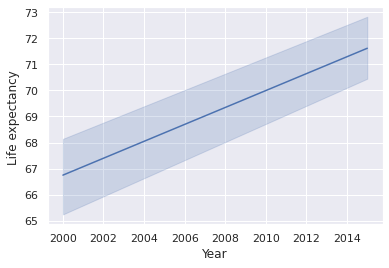

In [ ]:
# See how Year affects life expectancy
sns.lineplot(x= 'Year',y= 'Life expectancy ',data= life_df_2000_2015)

In [ ]:
# Is there a statistically difference in life expectancy between the population means of the
# years 2000 versus 2015 ?


# First, let's see what data we have
life_df_2000_2015[['Year', 'Life expectancy ']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 2937
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              366 non-null    int64  
 1   Life expectancy   366 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [ ]:
life_expectancy_2000 = life_df.iloc[(life_df['Year'] == 2000).values]
life_expectancy_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 15 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Status                           183 non-null    object 
 3   Life expectancy                  183 non-null    float64
 4   Adult Mortality                  183 non-null    float64
 5   infant deaths                    183 non-null    int64  
 6   Alcohol                          182 non-null    float64
 7   percentage expenditure           183 non-null    float64
 8   Hepatitis B                      85 non-null     float64
 9   Measles                          183 non-null    int64  
 10   BMI                             181 non-null    float64
 11  under-five deaths                183 non-null    int64  
 12  Polio               

In [ ]:
life_expectancy_2015 = life_df.iloc[(life_df['Year'] == 2015).values]
life_expectancy_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 2922
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          183 non-null    object 
 1   Year                             183 non-null    int64  
 2   Status                           183 non-null    object 
 3   Life expectancy                  183 non-null    float64
 4   Adult Mortality                  183 non-null    float64
 5   infant deaths                    183 non-null    int64  
 6   Alcohol                          6 non-null      float64
 7   percentage expenditure           183 non-null    float64
 8   Hepatitis B                      174 non-null    float64
 9   Measles                          183 non-null    int64  
 10   BMI                             181 non-null    float64
 11  under-five deaths                183 non-null    int64  
 12  Polio                

In [ ]:
stats.ttest_ind(life_expectancy_2000['Life expectancy '], life_expectancy_2015['Life expectancy '])

Ttest_indResult(statistic=-5.019984676944692, pvalue=8.104123060989446e-07)

There is a difference of 5 standard deviations between these two means. But is this just due to random chance, or is that difference significant? The p-value is extremely small, implying that this is a real difference.




In [ ]:
# Calculate the sample size, mean, and variance of each sample.
# Calculate the standard error and compute the confidence intervals.
# DO that bY callng the function get_95_ci that you have created 
# Early in this project

get_95_ci(life_expectancy_2000['Life expectancy '], life_expectancy_2015['Life expectancy '])

'The difference in means at the 95% confidence interval (two-tail) is between 2.966528064555951 and 6.766805268777284.'

Reject the null that is no difference between the population means. This difference is significant at the <.05 level. With 95% confidence, the diffence is between 3 years and 6.8 years diference in means.



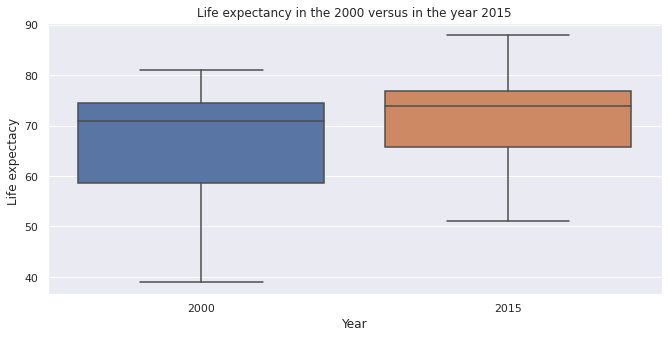

In [ ]:
# Plot a boxplot to see how life expectancy distributed in the year 2000 versus 2015
plt.figure(figsize = (11,5))
sns.boxplot(x="Year", y="Life expectancy ", data=life_df_2000_2015)
plt.xlabel('Year')
plt.ylabel('Life expectacy ')
plt.title('Life expectancy in the 2000 versus in the year 2015')
plt.show()

**Section 3: Conclusion**

The 2 factors provide a significant difference of the means of life expectancy.
Countries that have developed status  have a higher mean life expectancy in the the year 2000 compared to the ones that have developing status and year 2015  have higher mean life expectancy than year 2000.


With 95% confidence, the difference is between 10 years and 14 years means for the status of a country. For the year, the difference is between 3 years  and 6.8 years.